In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
file_store = "dataset/store.csv"
file_review = "dataset/user_reviews.csv"
file_store_clean = "dataset/store_clean.csv"
df_store = pd.read_csv(file_store)
df_review = pd.read_csv(file_review)

def analyze(df):
    #print(df_store.head(10))
    print(df.describe())
    print(df.info())

analyze(df_store)
#analyze(file_review)

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


In [49]:
def str_to_num(df):
    print("****************")
    words = dict()
    for s in df:
        words[s] = 1
    
    t = 0
    for key in words:
        words[key] = t
        t += 1
    print(words)
    for i in range(0, df.shape[0]):
        df[i] = str(words[df[i]])
    print(df.head(5))
    print("****************")
    return df
def convert_null(df):
    import math
    for i in range(0, df.shape[0]):
        if math.isnan(df[i]):
            df[i] = 0
    return df
def remove_nan(df):
    
    return df
def clean_store(df):
    #convert 3M to 3000000
    df.Reviews = (df.Reviews.replace(r'[KM]+$', '', regex=True).astype(float) * \
                  df.Reviews.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1) \
                  .replace(['K','M'], [10**3, 10**6]).astype(int))
    for index, row in df.iterrows():
        if row['Size'] != "Varies with device":
            row['Size'] = row['Size'][:-1]
            #print(row['Size'])
        else: row['Size'] = ""
    
    #remove M and varies from size
    
    d = {'Varies with device':'0'}
    df = df.replace(d)
    
    #df.Size = df.Size.str.extract('(\d+)', expand=False)
    df.Size = df.Size.str.replace(r"[+,A-Za-z]", '')
    '''
    df.Size = (df.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
                  df.Size.str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1) \
                  .replace(['k','M'], [10**3, 10**6]).astype(int))
    '''

    #df["Size"] = df.Size.astype(float)
    df["Size"] = pd.to_numeric(df.Size, errors='ignore')
    
    #convert Installs to int
    df.Installs = df.Installs.str.replace(r"[+,A-Za-z]", '')
    df["Installs"] = pd.to_numeric(df.Installs, errors='ignore')
    df["Installs"] = convert_null(df["Installs"].copy())
    #convert price to float
    df.Price = df.Price.str.replace(r"[$+,A-Za-z]", '')
    df["Price"] = pd.to_numeric(df.Price, errors='ignore')
    df["Installs"] = convert_null(df["Installs"].copy())

    #convert Category, Type, Content rating, Genres
    df['Category'] = pd.to_numeric(str_to_num(df['Category'].copy()))
    df['Type'] = pd.to_numeric(str_to_num(df['Type'].copy()))
    df['Content Rating'] = pd.to_numeric(str_to_num(df['Content Rating'].copy()))
    df['Genres'] = pd.to_numeric(str_to_num(df['Genres'].copy()))
    #remove NaN in rating
    #df = remove_nan(df.copy())
    df = df.dropna()
    #reconstruct colum
    cols = df.columns.tolist()
    cols = cols[1:2] + cols[3:10] + cols[2:3]
    df = df[cols]
    print(df.head(5))
    return df
df_store = clean_store(df_store)
analyze(df_store)
df_store.to_csv(file_store_clean, index=False)


****************
{'ART_AND_DESIGN': 0, 'AUTO_AND_VEHICLES': 1, 'BEAUTY': 2, 'BOOKS_AND_REFERENCE': 3, 'BUSINESS': 4, 'COMICS': 5, 'COMMUNICATION': 6, 'DATING': 7, 'EDUCATION': 8, 'ENTERTAINMENT': 9, 'EVENTS': 10, 'FINANCE': 11, 'FOOD_AND_DRINK': 12, 'HEALTH_AND_FITNESS': 13, 'HOUSE_AND_HOME': 14, 'LIBRARIES_AND_DEMO': 15, 'LIFESTYLE': 16, 'GAME': 17, 'FAMILY': 18, 'MEDICAL': 19, 'SOCIAL': 20, 'SHOPPING': 21, 'PHOTOGRAPHY': 22, 'SPORTS': 23, 'TRAVEL_AND_LOCAL': 24, 'TOOLS': 25, 'PERSONALIZATION': 26, 'PRODUCTIVITY': 27, 'PARENTING': 28, 'WEATHER': 29, 'VIDEO_PLAYERS': 30, 'NEWS_AND_MAGAZINES': 31, 'MAPS_AND_NAVIGATION': 32, '1.9': 33}
0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: object
****************
****************
{'Free': 0, 'Paid': 1, nan: 2, '0': 3}
0    0
1    0
2    0
3    0
4    0
Name: Type, dtype: object
****************
****************
{'Everyone': 0, 'Teen': 1, 'Everyone 10+': 2, 'Mature 17+': 3, 'Adults only 18+': 4, 'Unrated': 5, nan: 6}
0    0
1    0
2   

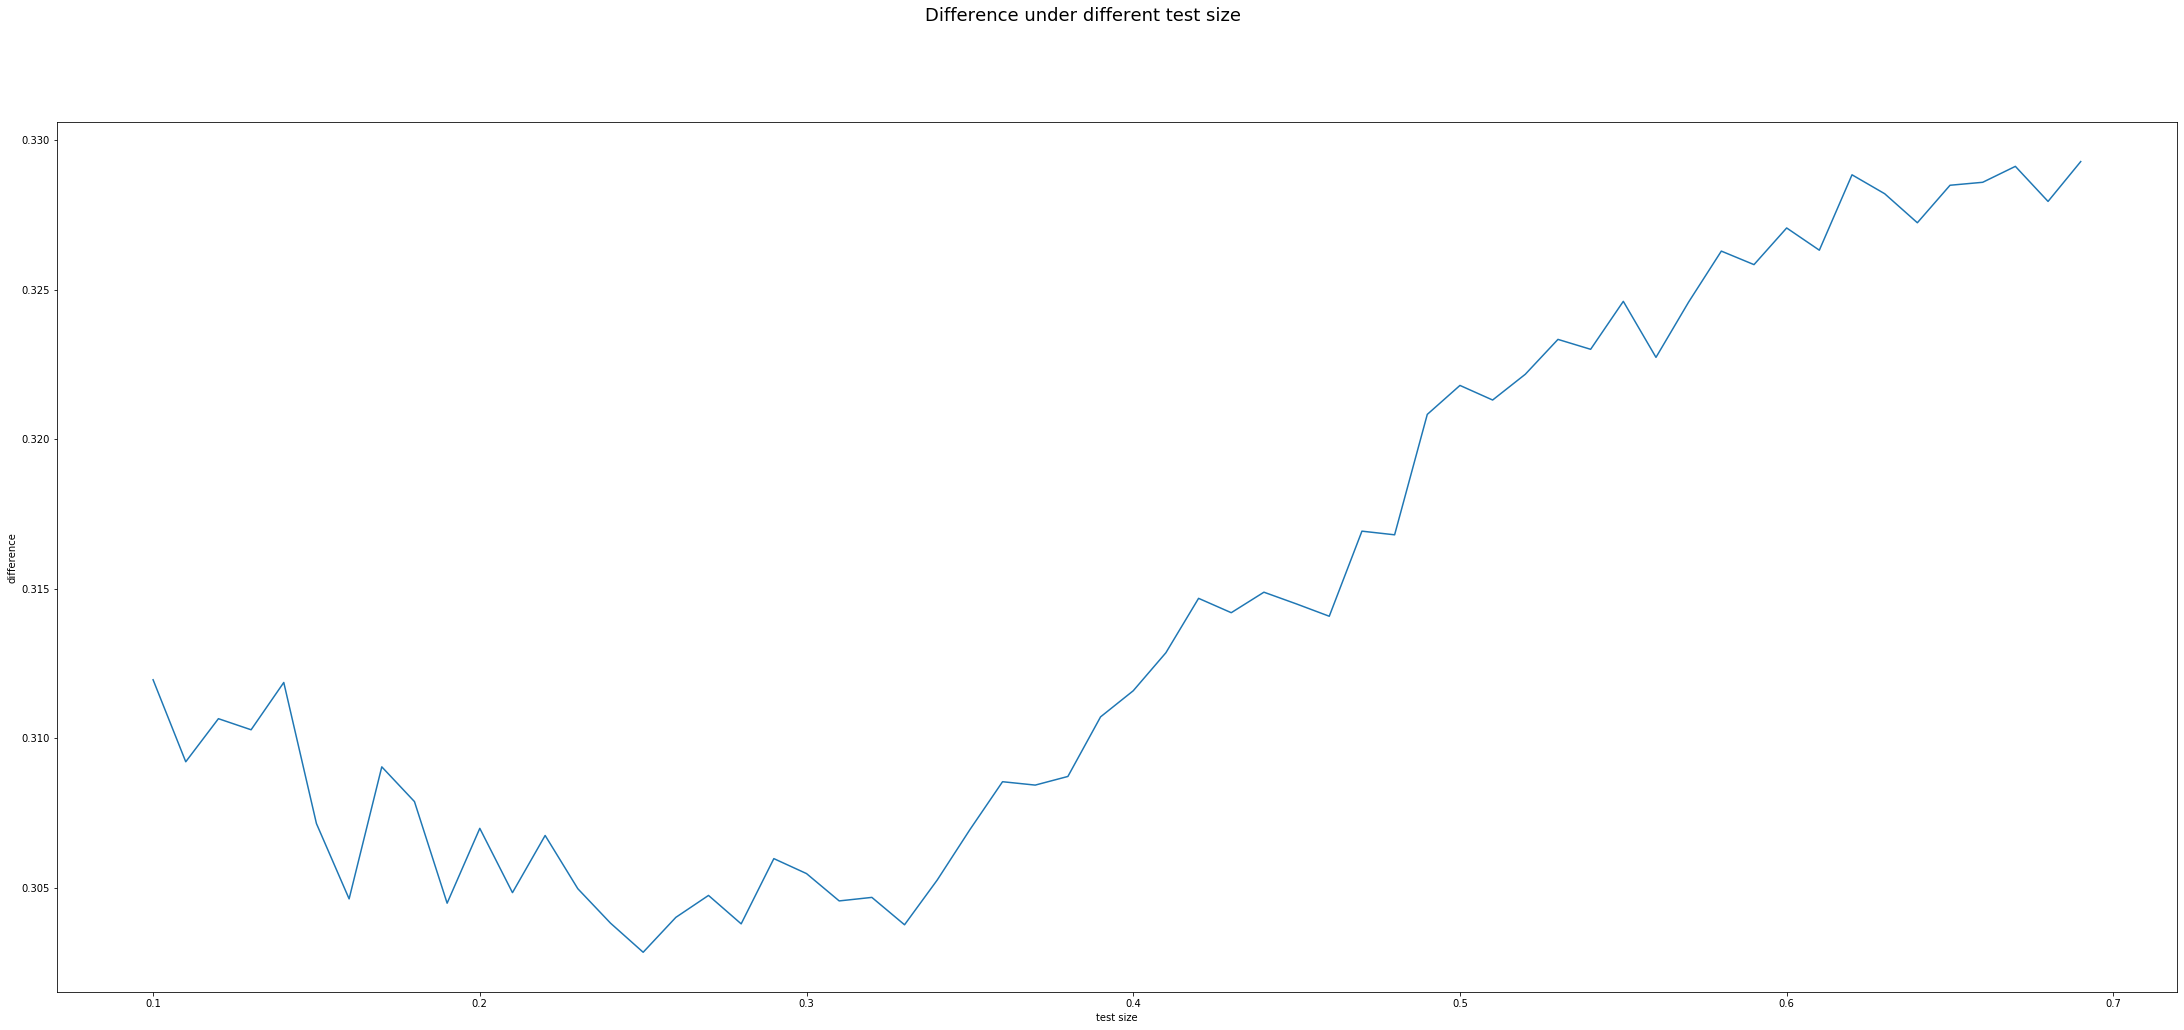

In [100]:
import pandas as pd
import numpy as np
import io
import requests
import math
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

def model_select(model, dataset, index, split_size, delete_feature):
    #print(dataset.shape)
    #devide data into features and labels
    y = dataset.iloc[:, index].values
    if delete_feature != " ":
        x_tmp = dataset.loc[:, dataset.columns != delete_feature]
        X = x_tmp.iloc[:, 0:index-1].values
    else:
        X = dataset.iloc[:, 0:index].values

    #split datasset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=0)
    
    #feature scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    #print(X_train[0:5, :])
    #print(y_train[0:5])
    
    #training for classification
    if model == "random_forest":
        clf=RandomForestRegressor(n_estimators=200)
    elif model == "boosting":
        clf=GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10)
    elif model == "knn":
        clf = KNeighborsRegressor(n_neighbors=5)
    elif model == "bagging":
        clf = BaggingRegressor(KNeighborsRegressor(), max_samples=0.5, max_features=0.5)
    elif model == "neural":
        clf = MLPRegressor(hidden_layer_sizes=(15,), random_state=1, max_iter=1, warm_start=True)
    elif model == "gpc":
        kernel = 1.0 * RBF(1.0)
        clf = GaussianProcessRegressor(kernel=kernel, random_state=0)
    elif model == "nb":
        clf = GaussianNB()
    elif model == "quadratic_discriminant":
        clf = QuadraticDiscriminantAnalysis()
    elif model == "decision_tree":
        clf = DecisionTreeRegressor(random_state=0)

    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    #difference between pred and test
    #print(y_pred[0:5])
    #print(y_test[0:5])
    diff = np.abs(y_pred - y_test)
    #print(diff[0:5])
    return np.mean(diff)



iter = 1

df_store_clean = pd.read_csv(file_store_clean)
df_store_clean.drop([0])
#df_store_clean = feature_scaling(df_store_clean)

def init(length):
    data = [0.0]*length
    return data

def plot_acc(data, xlabel, ylabel, title, x_axis):
    #print(data)
    color = '#1f77b4'
    fig, ax = plt.subplots(1, 1, figsize=(38, 16))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(x_axis, data, color=color)

    fig.suptitle(title, fontsize=18, ha='center')
    plt.show()
    
#plot split_size
def plot_test_size():
    x_axis = list(range(10, 70, 1))
    data = init(len(x_axis))
    for t in range(iter):
        for i in range(len(x_axis)):
            x_axis[i] = float(x_axis[i])/100
            acc = model_select("random_forest", df_store_clean, 8, x_axis[i], " ")
            data[i] += acc
    for i in range(len(x_axis)):
        data[i] /= iter
    plot_acc(data, "test size", "difference", "Difference under different test size", x_axis)
    
#plot model
def plot_model():
    #model_list = ["random_forest", "bagging", "knn", "boosting", "nb", "svm", "quadratic_discriminant", "decision_tree"]
    model_list = ["decision_tree", "random_forest", "bagging", "knn", "boosting"]
    x_axis = model_list
    data = init(len(x_axis))
    for t in range(iter):
        for i in range(len(x_axis)):
            acc = model_select(x_axis[i], df_store_clean, 8, 0.3, " ")
            data[i] += acc
            print(x_axis[i])
    for i in range(len(x_axis)):
        data[i] /= iter
    x_list = list(range(len(x_axis)))
    plot_acc(data, "model", "difference", "Difference under different model", x_axis)

#plot feature -user profile
def plot_feature():
    feature_list = list(df_store_clean.columns.values)
    x_axis = feature_list[:-1]
    data = init(len(x_axis))
    for t in range(iter):
        for i in range(len(x_axis)):
            acc = model_select("random_forest", df_store_clean, 8, 0.3, x_axis[i])
            data[i] += acc
            print(x_axis[i])
    for i in range(len(x_axis)):
        data[i] /= iter
    x_list = list(range(len(x_axis)))
    plot_acc(data, "deleted feature", "difference", "Difference under different deleted feature", x_axis)

plot_test_size()
plot_model()
plot_feature()